# TRAFFIC-SIGNS-CLASSIFICATIONS

Dataset taken from kaggle (https://www.kaggle.com/valentynsichkar/traffic-signs-preprocessed)😊
15-16 july 2020 🚀

tried to make it in a more simpilar manner
around 43 different traffic signs 
let me find out that traffic sign for you...😜

made using tensorflow 👀

In [1]:
import matplotlib.pyplot as mlt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import random
import pickle

In [2]:
with open("C:/Users/kumar/Documents/traffic-signs-data/train.pickle", mode='rb') as training_data:
  train = pickle.load(training_data)
with open("C:/Users/kumar/Documents/traffic-signs-data/valid.pickle", mode='rb') as validation_data:
  valid = pickle.load(validation_data)
with open("C:/Users/kumar/Documents/traffic-signs-data/test.pickle", mode='rb') as testing_data:
  test = pickle.load(testing_data)


In [3]:
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [4]:
x_valid.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape


(34799,)

8

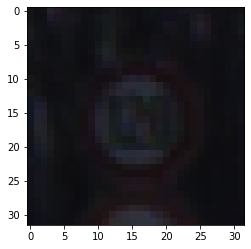

In [6]:
i = np.random.randint(1, len(x_train))
mlt.imshow(x_train[i])
y_train[i]

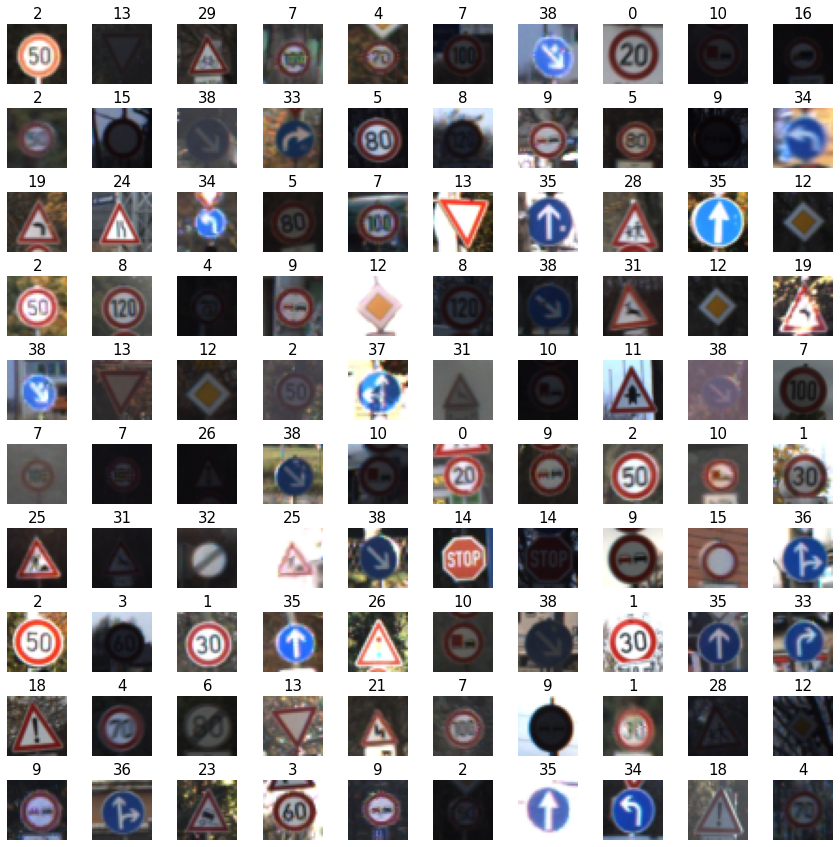

In [7]:
w_grid = 10
l_grid = 10

fig, axes = mlt.subplots(l_grid, w_grid, figsize=(15,15))
axes = axes.ravel()
n_training = len(x_train)

for i in np.arange(0, w_grid*l_grid):
    index = np.random.randint(0,n_training)
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')
    
mlt.subplots_adjust(hspace = 0.4)

In [8]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [9]:
x_train_gray = np.sum(x_train/3, axis=3, keepdims = True)
x_valid_gray = np.sum(x_valid/3, axis=3, keepdims = True)
x_test_gray = np.sum(x_test/3, axis=3, keepdims = True)

In [10]:
x_train_gray

array([[[[ 10.        ],
         [ 11.        ],
         [ 10.        ],
         ...,
         [ 13.        ],
         [ 12.        ],
         [ 11.33333333]],

        [[ 11.        ],
         [ 11.33333333],
         [ 11.        ],
         ...,
         [ 13.        ],
         [ 12.        ],
         [ 11.33333333]],

        [[ 11.        ],
         [ 11.33333333],
         [ 11.33333333],
         ...,
         [ 12.        ],
         [ 12.        ],
         [ 12.        ]],

        ...,

        [[ 43.33333333],
         [ 38.66666667],
         [ 32.33333333],
         ...,
         [ 10.66666667],
         [ 12.33333333],
         [ 14.33333333]],

        [[ 43.        ],
         [ 38.33333333],
         [ 34.        ],
         ...,
         [ 10.33333333],
         [ 12.33333333],
         [ 15.33333333]],

        [[ 44.        ],
         [ 38.        ],
         [ 27.66666667],
         ...,
         [  9.33333333],
         [ 12.        ],
         [ 14.333

In [11]:
x_train_gray.shape

(34799, 32, 32, 1)

In [12]:
#normal form
x_train_gray_normal = (x_train_gray - 128)/128
x_valid_gray_normal = (x_train_gray - 128)/128
x_test_gray_normal = (x_train_gray - 128)/128

In [13]:
x_train_gray_normal


array([[[[-0.921875  ],
         [-0.9140625 ],
         [-0.921875  ],
         ...,
         [-0.8984375 ],
         [-0.90625   ],
         [-0.91145833]],

        [[-0.9140625 ],
         [-0.91145833],
         [-0.9140625 ],
         ...,
         [-0.8984375 ],
         [-0.90625   ],
         [-0.91145833]],

        [[-0.9140625 ],
         [-0.91145833],
         [-0.91145833],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90625   ]],

        ...,

        [[-0.66145833],
         [-0.69791667],
         [-0.74739583],
         ...,
         [-0.91666667],
         [-0.90364583],
         [-0.88802083]],

        [[-0.6640625 ],
         [-0.70052083],
         [-0.734375  ],
         ...,
         [-0.91927083],
         [-0.90364583],
         [-0.88020833]],

        [[-0.65625   ],
         [-0.703125  ],
         [-0.78385417],
         ...,
         [-0.92708333],
         [-0.90625   ],
         [-0.88802083]]],


       [[[ 0.75260417],


In [14]:

x_valid_gray_normal.shape



(34799, 32, 32, 1)

<Figure size 432x288 with 0 Axes>

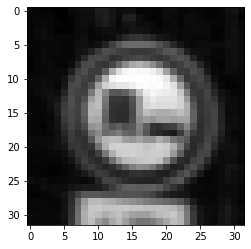

<Figure size 432x288 with 0 Axes>

In [15]:
i = random.randint(1, len(x_train_gray_normal))
mlt.imshow(x_train_gray_normal[i].squeeze(), cmap='gray')
mlt.figure()

In [16]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()
CNN.add(layers.Conv2D(6, (5, 5), activation = 'relu', input_shape = (32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))
CNN.add(layers.Dense(84, activation = 'relu'))
CNN.add(layers.Dense(43 , activation = 'softmax'))

CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

In [17]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = CNN.fit(x_train_gray_normal,
                 y_train,
                 batch_size = 500,
                 epochs = 5,
                 verbose = 1,
                 validation_data = (x_valid_gray_normal, y_valid))

Train on 34799 samples, validate on 34799 samples
Epoch 1/5
34799/34799 [==============================] - 31s 904us/sample - loss: 3.2190 - accuracy: 0.1555 - val_loss: 4.2706 - val_accuracy: 0.0451
Epoch 2/5
34799/34799 [==============================] - 22s 633us/sample - loss: 1.9348 - accuracy: 0.4611 - val_loss: 7.3111 - val_accuracy: 0.0403
Epoch 3/5
34799/34799 [==============================] - 24s 695us/sample - loss: 1.1343 - accuracy: 0.6700 - val_loss: 10.1146 - val_accuracy: 0.0383
Epoch 4/5
34799/34799 [==============================] - 24s 689us/sample - loss: 0.8140 - accuracy: 0.7641 - val_loss: 12.1545 - val_accuracy: 0.0387
Epoch 5/5
34799/34799 [==============================] - 22s 619us/sample - loss: 0.6646 - accuracy: 0.8080 - val_loss: 13.6915 - val_accuracy: 0.0380


Acurracy of 80% and can be increased with more epochs.😁